In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

In [2]:
df_train = pd.read_csv("../data/df_train_004.csv")
df_test = pd.read_csv("../data/df_test_004.csv")

df_train['target'] = df_train['사망자수']*10 + df_train['중상자수'] * \
    5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns=['사망자수', '중상자수', '경상자수', '부상자수'], axis=1, inplace=True)

In [3]:
X = df_train.drop(columns='target', axis=1)
y = df_train['target']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# book try

In [414]:
import math

batch_size = 32
n_epochs = 25
n_steps = n_epochs * math.ceil(len(x_train) / batch_size)

scheduled_lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=n_steps, decay_rate=0.1)

optimizer = tf.keras.optimizers.Nadam(learning_rate=scheduled_lr)

In [415]:
input_001 = tf.keras.layers.Input(shape=[11])
input_002 = tf.keras.layers.Input(shape=[22])
input_003 = tf.keras.layers.Input(shape=[33])

In [416]:
batchNormal_001_1 = tf.keras.layers.BatchNormalization()(input_001)
batchNormal_001_2 = tf.keras.layers.BatchNormalization()(input_002)
batchNormal_001_3 = tf.keras.layers.BatchNormalization()(input_003)

In [417]:
hidden_001_1 = tf.keras.layers.Dense(
    300, activation='swish')(batchNormal_001_1)
hidden_001_2 = tf.keras.layers.Dense(
    300, activation='swish')(batchNormal_001_2)
hidden_001_3 = tf.keras.layers.Dense(
    300, activation='swish')(batchNormal_001_3)

In [418]:
batchNormal_002_2 = tf.keras.layers.BatchNormalization()(hidden_001_2)
batchNormal_002_3 = tf.keras.layers.BatchNormalization()(hidden_001_3)

In [419]:
hidden_002_2 = tf.keras.layers.Dense(
    100, activation='swish')(batchNormal_002_2)
hidden_002_3 = tf.keras.layers.Dense(
    100, activation='swish')(batchNormal_002_3)

In [420]:
batchNormal_003_3 = tf.keras.layers.BatchNormalization()(hidden_002_3)

In [421]:
hidden_003_3 = tf.keras.layers.Dense(
    10, activation='swish')(batchNormal_003_3)

In [422]:
concat = tf.keras.layers.concatenate(
    [hidden_001_1, hidden_002_2, hidden_003_3])

In [423]:
output = tf.keras.layers.Dense(1)(concat)

In [424]:
model = tf.keras.Model(
    inputs=[input_001, input_002, input_003], outputs=[output])

In [425]:
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mse'])

In [426]:
x_train_001, x_train_002, x_train_003 = x_train.iloc[:,
                                                     :11], x_train.iloc[:, :22], x_train.iloc[:, :33]
x_test_001, x_test_002, x_test_003 = x_test.iloc[:,
                                                 :11], x_test.iloc[:, :22], x_test.iloc[:, :33]

In [427]:
early_stopping = EarlyStopping(monitor='loss')

In [428]:
history = model.fit((x_train_001, x_train_002, x_train_003), y_train, validation_data=(
    (x_test_001, x_test_002, x_test_003), y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
867/867 [==============================] - 12s 8ms/step - loss: 1.6316 - mse: 11.0386 - val_loss: 1.5618 - val_mse: 11.6241
Epoch 2/100
867/867 [==============================] - 6s 7ms/step - loss: 1.5827 - mse: 10.8664 - val_loss: 1.5590 - val_mse: 11.2316
Epoch 3/100
867/867 [==============================] - 6s 7ms/step - loss: 1.5788 - mse: 10.8210 - val_loss: 1.5738 - val_mse: 11.0515
Epoch 4/100
867/867 [==============================] - 6s 7ms/step - loss: 1.5773 - mse: 10.7905 - val_loss: 1.5551 - val_mse: 11.4902
Epoch 5/100
867/867 [==============================] - 6s 7ms/step - loss: 1.5740 - mse: 10.7487 - val_loss: 1.5563 - val_mse: 11.2903
Epoch 6/100
867/867 [==============================] - 6s 7ms/step - loss: 1.5739 - mse: 10.7452 - val_loss: 1.5579 - val_mse: 11.3588
Epoch 7/100
867/867 [==============================] - 6s 7ms/step - loss: 1.5693 - mse: 10.7072 - val_loss: 1.5647 - val_mse: 11.0788
Epoch 8/100
867/867 [==============================] -

<AxesSubplot:xlabel='에포크'>

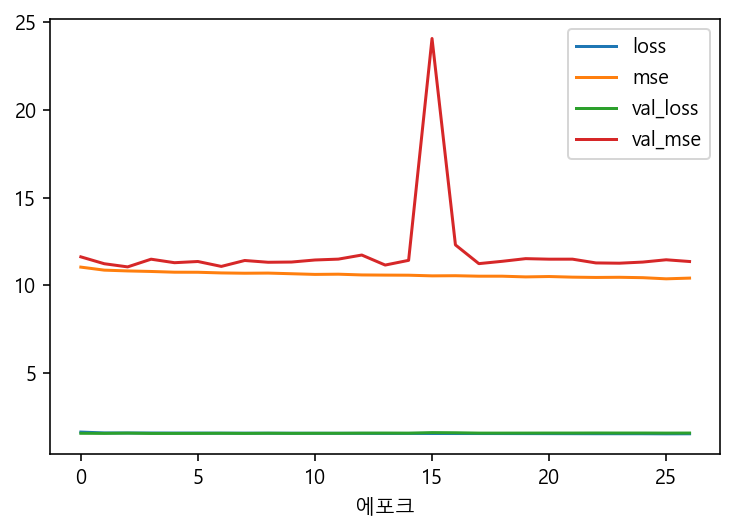

In [429]:
pd.DataFrame(history.history).plot(xlabel='에포크')

# 제출

In [435]:
model.save('../model/009_swish-model.h5')

In [436]:
sub_file = pd.read_csv("../data/sample_submission.csv")

In [437]:
sub_file['ECLO'] = model.predict((df_test.iloc[:,:11], df_test.iloc[:,:22], df_test.iloc[:,:33]))

343/343 [==============================] - 1s 2ms/step


In [438]:
sub_file['ECLO'] = round(sub_file['ECLO'])

In [439]:
for i in range(len(sub_file)):
    if sub_file.iloc[i,1] < 0 :
        sub_file.iloc[i, 1] = 0

In [440]:
sub_file['ECLO'].value_counts()

4.0     8356
3.0     1338
5.0     1101
6.0      150
7.0        6
0.0        6
2.0        2
10.0       2
1.0        1
11.0       1
Name: ECLO, dtype: int64

In [441]:
sub_file.to_csv("../data/sub_file/012tf_swish_round.csv", index=False)